# ML ZoomCamp Homework Session 3

This homework was described in: [homework.md](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/homework.md)

- [Getting the data](#get-data)
- [Exploratory Data Analysis (EDA)](#eda)
- [Question 1](#question-1)
- [Question 2](#question-2)
- [Question 3](#question-3)
- [Question 4](#question-4)
- [Question 5](#question-5)
- [Question 6](#question-6)

### Import Modules

In [139]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

import pprint

### Getting the data <a class="anchor" id="get-data"></a>

For this homework, we'll use the New York City Airbnb Open Data. Available [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv)

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'
if not os.path.exists("AB_NYC_2019.csv"):
    !wget $data

features = ['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df = pd.read_csv('AB_NYC_2019.csv')
df = df[features]
df.head()

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,NaN,1,365
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0


In [3]:
df.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
print(df.shape, len(df))

(48895, 10) 48895


### Preparing Data

In [5]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [6]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [7]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [8]:
df['neighbourhood_group'].unique()

array(['brooklyn', 'manhattan', 'queens', 'staten_island', 'bronx'],
      dtype=object)

In [9]:
df['room_type'].unique()

array(['private_room', 'entire_home/apt', 'shared_room'], dtype=object)

In [10]:
df['availability_365'].unique()

array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314, 333,  46, 321,
        12,  21, 249, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284,
       359, 269, 340,  22,  96, 345, 273, 309,  95, 215, 265, 192, 251,
       302, 140, 234, 257,  30, 301, 294, 320, 154, 263, 180, 231, 297,
       292, 191,  72, 362, 336, 116,  88, 224, 322, 324, 132, 295, 238,
       209, 328,  38,   7, 272,  26, 288, 317, 207, 185, 158,   9, 198,
       219, 342, 312, 243, 152, 137, 222, 346, 208, 279, 250, 164, 298,
       260, 107, 199, 299,  20, 318, 216, 245, 189, 307, 310, 213, 278,
        16, 178, 275, 163,  34, 280,   1, 170, 214, 248, 262, 339,  10,
       290, 230,  53, 126,   3,  37, 353, 177, 246, 225,  18, 343, 326,
       162, 240, 363, 247, 323, 125,  91, 286,  60,  58, 351, 201, 232,
       258, 341, 244, 329, 253, 348,   2,  56,  68, 360,  76,  15, 226,
       349,  11, 316, 281, 287,  14,  86, 261, 331,  51, 254, 103,  42,
       325,  35, 203,   5, 276, 102,  71,  78,   8, 182,  79,  4

### Manage missing values

In [11]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.fillna(0, inplace=True)
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Question 1 <a class="anchor" id="question-1"></a>
What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [15]:
df['neighbourhood_group'].describe()

count         48895
unique            5
top       manhattan
freq          21661
Name: neighbourhood_group, dtype: object

In [16]:
print(f"[ANSWER-1] The mode of the column 'neighbourhood_group' is {df['neighbourhood_group'].mode().values[0]} with {(df['neighbourhood_group'] == 'manhattan').astype('int').sum()} aparitions")

[ANSWER-1] The mode of the column 'neighbourhood_group' is manhattan with 21661 aparitions


### Split the data

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [18]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

del df_train['price']
del df_val['price']
del df_test['price']

### Question 2 <a class="anchor" id="question-2"></a>

- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

Source: <a href=https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas>List Highest Correlation Pairs from a Large Correlation Matrix in Pandas?</a> 

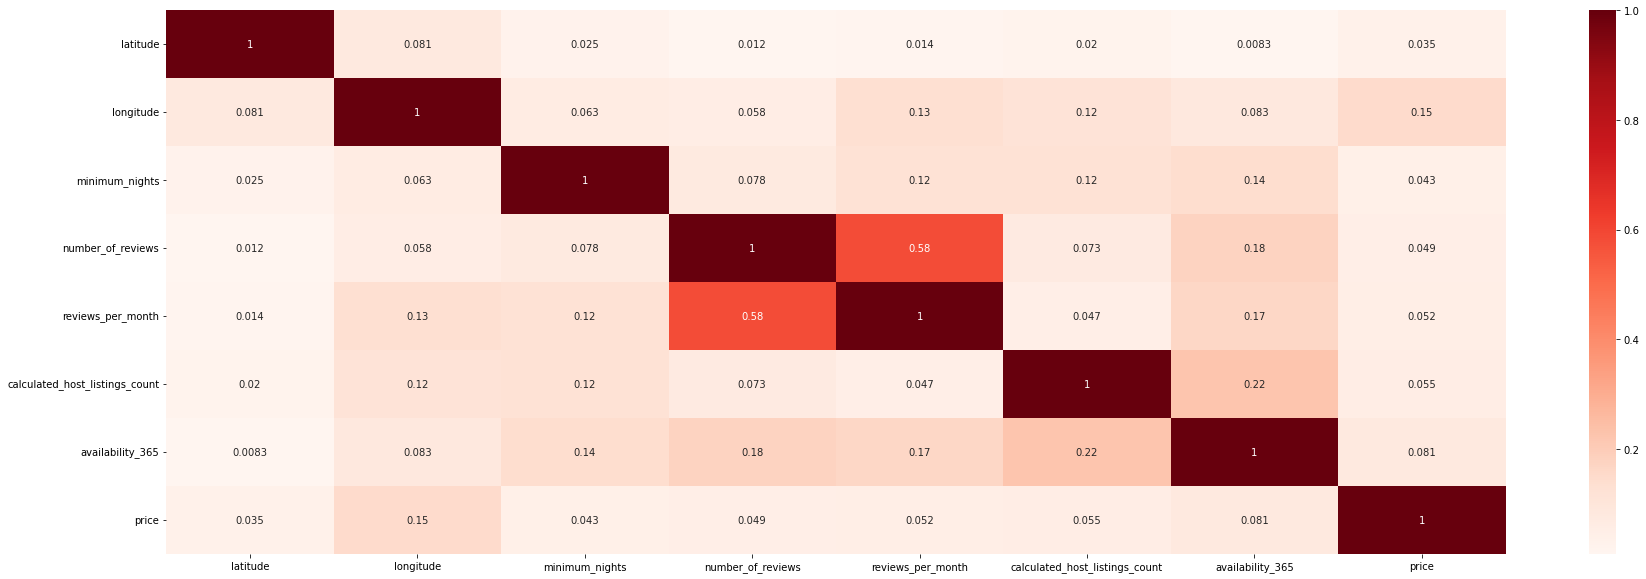

In [21]:

numerical = ['latitude', 'longitude',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']

dfCorr = df_full_train[numerical+ ['price']].corr().abs()
plt.figure(figsize=(30,10))
sns.heatmap(dfCorr, annot=True, cmap="Reds")
plt.show()

In [22]:
print("[ANSWER-2] The two features with biggest correlation are: number_of_reviews and reviews_per_month")

[ANSWER-2] The two features with biggest correlation are: number_of_reviews and reviews_per_month


### Make price binary

In [23]:
df.price.mean()

152.7206871868289

In [118]:
above_average = (y_train >= 152).astype('int')
above_average_val = (y_val >= 152).astype('int')
above_average_test = (y_test >= 152).astype('int')

### Question 3 <a class="anchor" id="question-3"></a>

- Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
- Which of these two variables has bigger score?
- Round it to 2 decimal digits using round(score, 2)

In [119]:
categorical = ['neighbourhood_group', 'room_type']
def mutual_info_above_average_score(series):
    return round(mutual_info_score(series, above_average), 2)

mi = df_train[categorical].apply(mutual_info_above_average_score)
mi.sort_values(ascending=False)

room_type              0.14
neighbourhood_group    0.05
dtype: float64

In [28]:
print("[ANSWER-3] The variable 'room_type' has bigger mutual information score (0.14)")

[ANSWER-3] The variable 'room_type' has bigger mutual information score (0.14)


### Question 4 <a class="anchor" id="question-4"></a>
- Now let's train a logistic regression
- Remember that we have two categorical variables in the data. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
- Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

### One-hot encoding

In [29]:
df_train

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,entire_home/apt,40.72760,-73.94495,3,29,0.70,13,50
1,manhattan,private_room,40.70847,-74.00498,1,0,0.00,1,7
2,bronx,entire_home/apt,40.83149,-73.92766,40,0,0.00,1,0
3,brooklyn,entire_home/apt,40.66448,-73.99407,2,3,0.08,1,0
4,manhattan,private_room,40.74118,-74.00012,1,48,1.80,2,67
...,...,...,...,...,...,...,...,...,...
29332,brooklyn,private_room,40.71748,-73.95685,6,5,0.13,1,0
29333,brooklyn,private_room,40.66397,-73.98538,1,7,0.17,2,0
29334,manhattan,private_room,40.79994,-73.97001,1,1,0.64,1,88
29335,brooklyn,private_room,40.69585,-73.96344,60,0,0.00,1,0


In [140]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [141]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten_island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=entire_home/apt',
 'room_type=private_room',
 'room_type=shared_room']

In [142]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, above_average)

LogisticRegression(random_state=42, solver='liblinear')

In [143]:
model.intercept_[0]

-0.09158588386078534

In [144]:
model.coef_[0].round(3)

array([ 3.000e-03,  4.000e-03, -5.818e+00, -3.166e+00, -1.100e-02,
       -8.200e-02,  1.250e-01,  1.576e+00, -2.900e-02, -1.681e+00,
       -3.000e-03, -4.200e-02,  1.957e+00, -8.200e-01, -1.228e+00])

In [145]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.02878751, 0.59581877, 0.42623389, ..., 0.11418692, 0.03457731,
       0.52841536])

In [146]:
#above_average_decision = (y_pred >= 0.5)
#all_features_accuracy = (above_average_val == above_average_decision).mean()
all_features_accuracy = model.score(X_val, above_average_val)
all_features_accuracy

0.7907761529808774

In [132]:
print(f"[ANSWER-4] The accuracy of the model on the validation dataset is: {round(all_features_accuracy, 2)}")

[ANSWER-4] The accuracy of the model on the validation dataset is: 0.79


### Question 5 <a class="anchor" id="question-5"></a>
- We have 9 features: 7 numerical features and 2 categorical.
- Let's find the least useful one using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - neighbourhood_group
    - room_type
    - number_of_reviews
    - reviews_per_month
- note: the difference doesn't have to be positive

In [134]:
differences = dict()
total_features = numerical + strings
for feature in total_features:
    #print(feature)
    
    df_train_copy = df_train.copy()
    del df_train_copy[feature]
    
    df_val_copy = df_val.copy()
    del df_val_copy[feature]
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train_copy.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val_copy.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    #print(dv.get_feature_names())
    model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
    model.fit(X_train, above_average)
    
    #y_pred = model.predict_proba(X_val)[:, 1]
    #above_average_decision = (y_pred >= 0.5)
    #no_feature_accuracy = (above_average_val == above_average_decision).mean()
    no_feature_accuracy = model.score(X_val, above_average_val)
    differences[feature] = round(all_features_accuracy - no_feature_accuracy, 4)
    
for key, value in differences.items():
    print(f"{key}:{value}")
    

latitude:0.004
longitude:0.0038
minimum_nights:-0.0007
number_of_reviews:-0.0006
reviews_per_month:0.0
calculated_host_listings_count:0.0011
availability_365:0.0093
neighbourhood_group:0.0409
room_type:0.0621


In [135]:
print("[ANSWER-5] The feature with smallest difference (of the list) is: reviews_per_month")

[ANSWER-5] The feature with smallest difference (of the list) is: reviews_per_month


### Question 6 <a class="anchor" id="question-6"></a>

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest alpha.

In [153]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [154]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [155]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [156]:
results = dict()
best_rmse = None
best_rmse_arg = None

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    raw_rmse = rmse(y_val, y_pred)
    if best_rmse is None:
        best_rmse = raw_rmse
        best_rmse_arg = a
    elif raw_rmse < best_rmse:
        best_rmse = raw_rmse
        best_rmse_arg = a
    results[a] = round(raw_rmse, 3)

print(f"[ANSWER-6] Best RMSE is {round(best_rmse, 3)} for r value: {best_rmse_arg}")

[ANSWER-6] Best RMSE is 0.085 for r value: 0.01
